# Ploting survey results with plot-likert

Author(s): Miguel Xochicale @mxochicale    
Contributor(s): Antonio Badillo-Perez and Donato Badillo-Perez

## Running notebook
```
conda activate simpleVE
jupyter notebook --browser=firefox
```
## Logbook
* 25Feb2023: Adds likert scale charts
* 26Feb2023: Refine likert scale charts


## References:
* https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
* http://www.mishou.be/2021/10/11/python-plot-liker-with-plot-likert/
* https://colab.research.google.com/drive/1j8Z5ol4ozY6sM8UX_dstADtc7TCs8tkk?usp=sharing#scrollTo=0nvvT9e-t1At


In [1]:
import plot_likert
import pandas as pd
import numpy as np

In [2]:
# define my scale
scale = \
    ['Strongly disagree', #1
     'Neither agree nor disagree', #2
     'Strongly agree'] #3

# define table list with answer of 9 participants and 20 questions
# from https://docs.google.com/spreadsheets/d/1opneApebCVdR36LjhWEtofRAgXQZskzm4lvJNrit5Ms/edit#gid=1598998468
table_list={ 
    'S1 [L01]':{
            'p1': 'Neither agree nor disagree', 
            'p2': 'Neither agree nor disagree', 
            'p3': 'Strongly disagree', 
            'p4': 'Neither agree nor disagree',
            'p5': 'Neither agree nor disagree', 
            'p6': 'Neither agree nor disagree', 
            'p7': 'Neither agree nor disagree', 
            'p8': 'Strongly disagree', 
            'p9': 'Neither agree nor disagree'}, 
    'S1 [L04]':{
            'p1': 'Strongly disagree', 
            'p2': 'Neither agree nor disagree', 
            'p3': 'Neither agree nor disagree', 
            'p4': 'Strongly disagree',
            'p5': 'Neither agree nor disagree', 
            'p6': 'Strongly agree', 
            'p7': 'Strongly agree', 
            'p8': 'Strongly disagree', 
            'p9': 'Neither agree nor disagree'},
    'S2 [L01]':{
            'p1': 'Strongly disagree', 
            'p2': 'Strongly disagree', 
            'p3': 'Strongly disagree', 
            'p4': 'Neither agree nor disagree',
            'p5': 'Strongly disagree', 
            'p6': 'Strongly disagree', 
            'p7': 'Strongly agree', 
            'p8': 'Strongly disagree', 
            'p9': 'Strongly disagree'}, 
    'S2 [L04]':{
            'p1': 'Strongly disagree', 
            'p2': 'Strongly disagree', 
            'p3': 'Strongly agree', 
            'p4': 'Neither agree nor disagree',
            'p5': 'Strongly disagree', 
            'p6': 'Neither agree nor disagree', 
            'p7': 'Neither agree nor disagree', 
            'p8': 'Neither agree nor disagree', 
            'p9': 'Strongly disagree'},
    'S3 [L01]':{
            'p1': scale[1], 
            'p2': scale[2], 
            'p3': scale[2], 
            'p4': scale[2],
            'p5': scale[1], 
            'p6': scale[1], 
            'p7': scale[1], 
            'p8': scale[1], 
            'p9': scale[0]}, 
    'S3 [L04]':{
            'p1': scale[2], 
            'p2': scale[2], 
            'p3': scale[1], 
            'p4': scale[2],
            'p5': scale[1], 
            'p6': scale[2], 
            'p7': scale[2], 
            'p8': scale[2], 
            'p9': scale[2]},
    'S4 [L01]':{
            'p1': scale[1-1], 
            'p2': scale[3-1], 
            'p3': scale[1-1], 
            'p4': scale[3-1],
            'p5': scale[2-1], 
            'p6': scale[2-1], 
            'p7': scale[1-1], 
            'p8': scale[1-1], 
            'p9': scale[2-1]}, 
    'S4 [L04]':{
            'p1': scale[3-1], 
            'p2': scale[3-1], 
            'p3': scale[2-1], 
            'p4': scale[2-1],
            'p5': scale[2-1], 
            'p6': scale[1-1], 
            'p7': scale[2-1], 
            'p8': scale[1-1], 
            'p9': scale[1-1]},
    'S5 [L01]':{
            'p1': scale[2-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[1-1], 
            'p8': scale[3-1], 
            'p9': scale[3-1]}, 
    'S5 [L04]':{
            'p1': scale[3-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[2-1], 
            'p6': scale[3-1], 
            'p7': scale[1-1], 
            'p8': scale[1-1], 
            'p9': scale[3-1]},
    'S6 [L01]':{
            'p1': scale[3-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[3-1], 
            'p9': scale[3-1]}, 
    'S6 [L04]':{
            'p1': scale[3-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[2-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[2-1], 
            'p9': scale[3-1]},
    'S7 [L01]':{
            'p1': scale[2-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[1-1],
            'p5': scale[2-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[1-1], 
            'p9': scale[1-1]}, 
    'S7 [L04]':{
            'p1': scale[2-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[1-1],
            'p5': scale[2-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[3-1], 
            'p9': scale[2-1]},
    'S8 [L01]':{
            'p1': scale[3-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[3-1], 
            'p9': scale[3-1]}, 
    'S8 [L04]':{
            'p1': scale[3-1], 
            'p2': scale[3-1], 
            'p3': scale[2-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[2-1], 
            'p9': scale[3-1]},
    'S9 [L01]':{
            'p1': scale[3-1], 
            'p2': scale[1-1], 
            'p3': scale[1-1], 
            'p4': scale[3-1],
            'p5': scale[2-1], 
            'p6': scale[1-1], 
            'p7': scale[3-1], 
            'p8': scale[2-1], 
            'p9': scale[1-1]}, 
    'S9 [L04]':{
            'p1': scale[2-1], 
            'p2': scale[1-1], 
            'p3': scale[2-1], 
            'p4': scale[2-1],
            'p5': scale[3-1], 
            'p6': scale[1-1], 
            'p7': scale[3-1], 
            'p8': scale[2-1], 
            'p9': scale[1-1]},
    'S10 [L01]':{
            'p1': scale[2-1], 
            'p2': scale[1-1], 
            'p3': scale[1-1], 
            'p4': scale[2-1],
            'p5': scale[3-1], 
            'p6': scale[1-1], 
            'p7': scale[1-1], 
            'p8': scale[2-1], 
            'p9': scale[3-1]}, 
    'S10 [L04]':{
            'p1': scale[1-1], 
            'p2': scale[1-1], 
            'p3': scale[2-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[1-1], 
            'p7': scale[3-1], 
            'p8': scale[3-1], 
            'p9': scale[3-1]},
    'S11 [L01]':{
            'p1': scale[2-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[2-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[3-1], 
            'p9': scale[3-1]}, 
    'S11 [L04]':{
            'p1': scale[3-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[2-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[3-1], 
            'p9': scale[3-1]},
    'S12 [L01]':{
            'p1': scale[2-1], 
            'p2': scale[2-1], 
            'p3': scale[2-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[1-1], 
            'p8': scale[2-1], 
            'p9': scale[3-1]}, 
    'S12 [L04]':{
            'p1': scale[2-1], 
            'p2': scale[2-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[1-1], 
            'p8': scale[2-1], 
            'p9': scale[2-1]},
    'S13 [L01]':{
            'p1': scale[2-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[3-1], 
            'p9': scale[3-1]}, 
    'S13 [L04]':{
            'p1': scale[3-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[2-1], 
            'p6': scale[3-1], 
            'p7': scale[1-1], 
            'p8': scale[3-1], 
            'p9': scale[3-1]},
    'S14 [L01]':{
            'p1': scale[3-1], 
            'p2': scale[2-1], 
            'p3': scale[1-1], 
            'p4': scale[3-1],
            'p5': scale[1-1], 
            'p6': scale[2-1], 
            'p7': scale[2-1], 
            'p8': scale[2-1], 
            'p9': scale[3-1]}, 
    'S14 [L04]':{
            'p1': scale[1-1], 
            'p2': scale[2-1], 
            'p3': scale[2-1], 
            'p4': scale[3-1],
            'p5': scale[1-1], 
            'p6': scale[2-1], 
            'p7': scale[3-1], 
            'p8': scale[3-1], 
            'p9': scale[2-1]},
    'S15 [L01]':{
            'p1': scale[1-1], 
            'p2': scale[3-1], 
            'p3': scale[1-1], 
            'p4': scale[1-1],
            'p5': scale[1-1], 
            'p6': scale[1-1], 
            'p7': scale[3-1], 
            'p8': scale[1-1], 
            'p9': scale[3-1]}, 
    'S15 [L04]':{
            'p1': scale[2-1], 
            'p2': scale[2-1], 
            'p3': scale[3-1], 
            'p4': scale[1-1],
            'p5': scale[3-1], 
            'p6': scale[1-1], 
            'p7': scale[3-1], 
            'p8': scale[2-1], 
            'p9': scale[1-1]},
    'S16 [L01]':{
            'p1': scale[2-1], 
            'p2': scale[1-1], 
            'p3': scale[1-1], 
            'p4': scale[1-1],
            'p5': scale[2-1], 
            'p6': scale[1-1], 
            'p7': scale[3-1], 
            'p8': scale[2-1], 
            'p9': scale[1-1]}, 
    'S16 [L04]':{
            'p1': scale[2-1], 
            'p2': scale[1-1], 
            'p3': scale[1-1], 
            'p4': scale[1-1],
            'p5': scale[2-1], 
            'p6': scale[1-1], 
            'p7': scale[3-1], 
            'p8': scale[1-1], 
            'p9': scale[1-1]},
    'S17 [L01]':{
            'p1': scale[3-1], 
            'p2': scale[2-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[3-1], 
            'p9': scale[3-1]}, 
    'S17 [L04]':{
            'p1': scale[2-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[3-1], 
            'p6': scale[3-1], 
            'p7': scale[3-1], 
            'p8': scale[2-1], 
            'p9': scale[3-1]},
    'S18 [L01]':{
            'p1': scale[2-1], 
            'p2': scale[2-1], 
            'p3': scale[2-1], 
            'p4': scale[3-1],
            'p5': scale[2-1], 
            'p6': scale[2-1], 
            'p7': scale[3-1], 
            'p8': scale[2-1], 
            'p9': scale[3-1]}, 
    'S18 [L04]':{
            'p1': scale[2-1], 
            'p2': scale[3-1], 
            'p3': scale[3-1], 
            'p4': scale[3-1],
            'p5': scale[2-1], 
            'p6': scale[3-1], 
            'p7': scale[1-1], 
            'p8': scale[3-1], 
            'p9': scale[2-1]},
    'S19 [L01]':{
            'p1': scale[1-1], 
            'p2': scale[3-1], 
            'p3': scale[1-1], 
            'p4': scale[1-1],
            'p5': scale[1-1], 
            'p6': scale[2-1], 
            'p7': scale[1-1], 
            'p8': scale[1-1], 
            'p9': scale[2-1]}, 
    'S19 [L04]':{
            'p1': scale[2-1], 
            'p2': scale[3-1], 
            'p3': scale[2-1], 
            'p4': scale[1-1],
            'p5': scale[3-1], 
            'p6': scale[2-1], 
            'p7': scale[2-1], 
            'p8': scale[2-1], 
            'p9': scale[2-1]},
    'S20 [L01]':{
            'p1': scale[3-1], 
            'p2': scale[2-1], 
            'p3': scale[1-1], 
            'p4': scale[3-1],
            'p5': scale[2-1], 
            'p6': scale[1-1], 
            'p7': scale[1-1], 
            'p8': scale[2-1], 
            'p9': scale[2-1]}, 
    'S20 [L04]':{
            'p1': scale[3-1], 
            'p2': scale[3-1], 
            'p3': scale[1-1], 
            'p4': scale[2-1],
            'p5': scale[3-1], 
            'p6': scale[2-1], 
            'p7': scale[2-1], 
            'p8': scale[3-1], 
            'p9': scale[1-1]}    
}

# scale = \
#     ['Strongly disagree', scale[0]
#      'Neither agree nor disagree', scale[1]
#      'Strongly agree'] scale[2]


#     'Q4 [L01]':{
#             'p1': scale[-1], 
#             'p2': scale[-1], 
#             'p3': scale[-1], 
#             'p4': scale[-1],
#             'p5': scale[-1], 
#             'p6': scale[-1], 
#             'p7': scale[-1], 
#             'p8': scale[-1], 
#             'p9': scale[-1]}, 
#     'Q4 [L04]':{
#             'p1': scale[-1], 
#             'p2': scale[-1], 
#             'p3': scale[-1], 
#             'p4': scale[-1],
#             'p5': scale[-1], 
#             'p6': scale[-1], 
#             'p7': scale[-1], 
#             'p8': scale[-1], 
#             'p9': scale[-1]}
        
data = pd.DataFrame(table_list)
data

,S1 [L01],S1 [L04],S2 [L01],S2 [L04],S3 [L01],S3 [L04],S4 [L01],S4 [L04],S5 [L01],S5 [L04],...,S16 [L01],S16 [L04],S17 [L01],S17 [L04],S18 [L01],S18 [L04],S19 [L01],S19 [L04],S20 [L01],S20 [L04]
p1,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Strongly agree,Strongly disagree,Strongly agree,Neither agree nor disagree,Strongly agree,...,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree,Strongly agree,Strongly agree
p2,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,...,Strongly disagree,Strongly disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree
p3,Strongly disagree,Neither agree nor disagree,Strongly disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree,Strongly agree,Strongly agree,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly disagree,Neither agree nor disagree,Strongly disagree,Strongly disagree
p4,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Neither agree nor disagree
p5,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,...,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Strongly agree,Neither agree nor disagree,Strongly agree
p6,Neither agree nor disagree,Strongly agree,Strongly disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Strongly disagree,Strongly agree,Strongly agree,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree
p7,Neither agree nor disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly disagree,Neither agree nor disagree,Strongly disagree,Strongly disagree,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree
p8,Strongly disagree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,...,Neither agree nor disagree,Strongly disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree
p9,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Neither agree nor disagree,Strongly disagree,Strongly agree,Strongly agree,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree


/home/mxochicale/anaconda3/envs/simpleVE/lib/python3.11/site-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<Axes: xlabel='Percentage of Responses'>

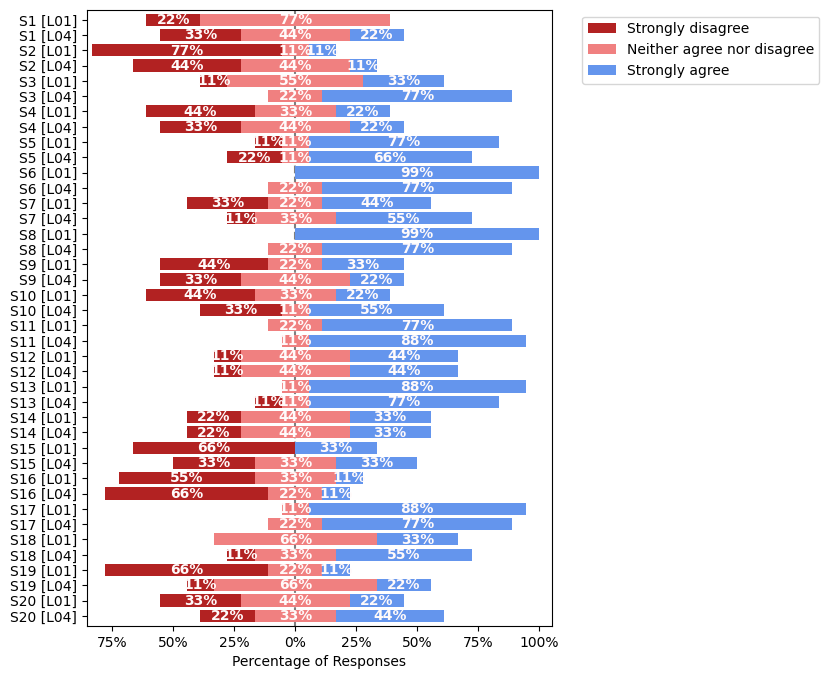

In [3]:
plot_likert.plot_likert(data, 
                        scale, 
                        plot_percentage=True,
                        bar_labels=True, 
                        bar_labels_color="snow", 
                        #colors=plot_likert.colors.default_with_darker_neutral,
                        colors=plot_likert.colors.likert4,
                        width=0.8,  # make the bars slimmer
                        figsize=(6,8))
